<a href="https://colab.research.google.com/github/zergulaydin/Classification-of-Fake-Bot-and-Real-Accounts-on-Instagram-Using-Machine-Learning/blob/main/YAEM_bike_sharing_Final_major_revizyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


Dosya Okuma

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/akademik çalışmalar/In progress/bike sharing/data/hour.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


"""
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
"""

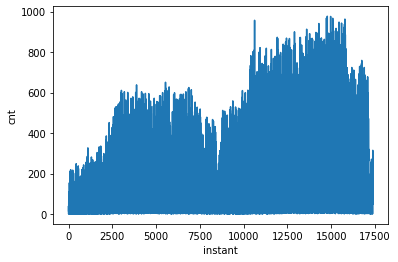

In [ ]:
import seaborn as sns
sns.lineplot(x=df['instant'],y=df['cnt'])


In [ ]:
df.drop(['casual','registered','instant'],axis=1,inplace=True)

In [ ]:
import datetime as dt
df['dteday'] =df['dteday'].str[-2:].astype(int)
df['dteday']

0         1
1         1
2         1
3         1
4         1
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: dteday, Length: 17379, dtype: int64

Eksik Veri

In [ ]:
import numpy as np
df.replace("?",np.NaN, inplace=True)

In [ ]:
df.isnull().any()

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool

In [ ]:
df.duplicated().any()


False

In [ ]:

corr=df.corr()
corr

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,1.000000,-0.003052,0.002057,0.007929,0.001538,-0.010132,0.002145,0.008627,-0.003882,0.027180,0.021269,0.025663,0.010505,-0.004312
season,-0.003052,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
yr,0.002057,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,0.007929,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,0.001538,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.010132,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,0.002145,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,0.008627,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.003882,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.027180,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772


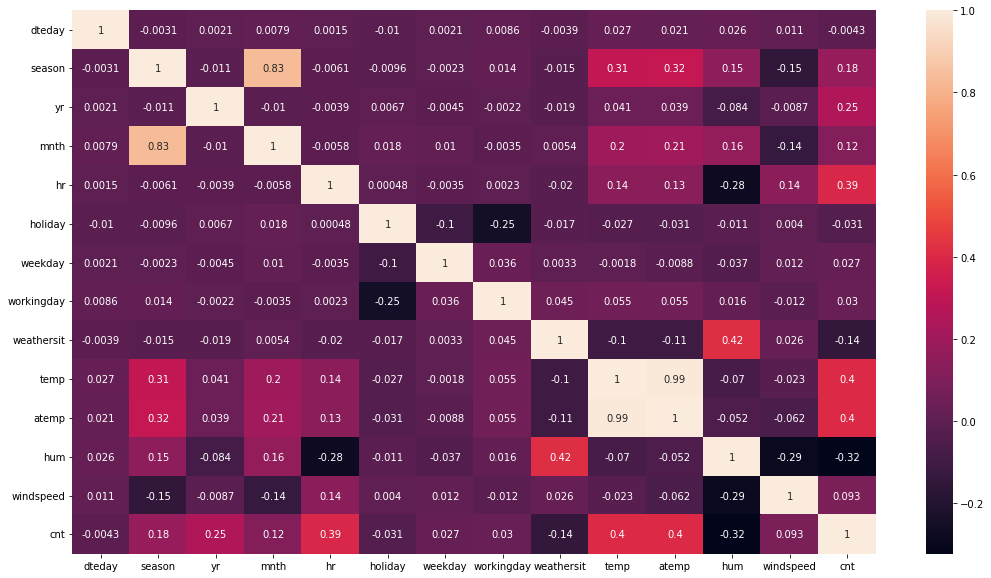

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(figsize = (18,10))# Sample figsize in inches
sns.heatmap(df.corr(),annot = True )

In [ ]:
df.drop('atemp',axis=1,inplace=True)

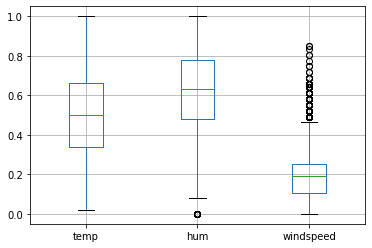

In [ ]:
columns=['temp','hum','windspeed']
df[columns].boxplot()

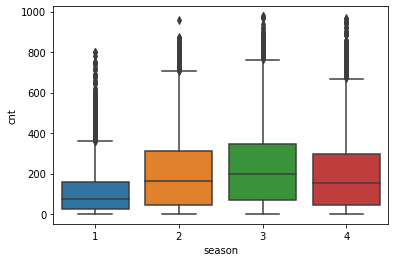

In [ ]:
import seaborn as sns
sns.boxplot(x="season", y="cnt", data=df) #1:winter, 2:spring, 3:summer, 4:fall

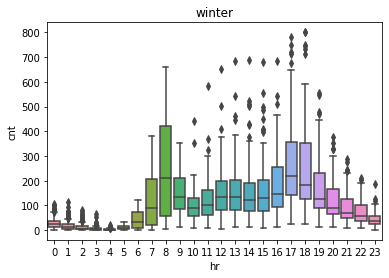

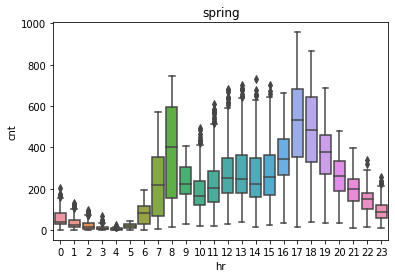

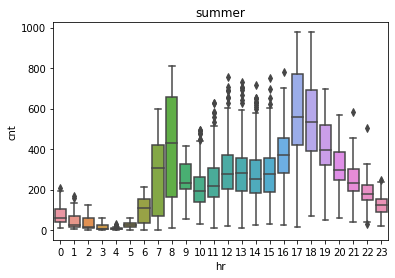

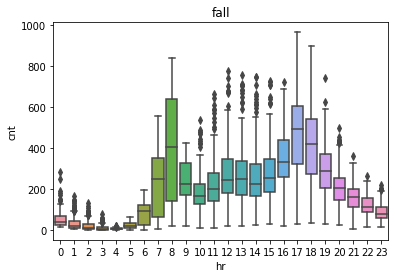

In [ ]:
import seaborn as sns
season_list=["winter", "spring", "summer", "fall"]
for i in range(1,5):
  df_season=df[df['season']==i]
  sns.boxplot(x="hr" ,y="cnt", data=df_season)
  plt.title(season_list[i-1])
  plt.show()

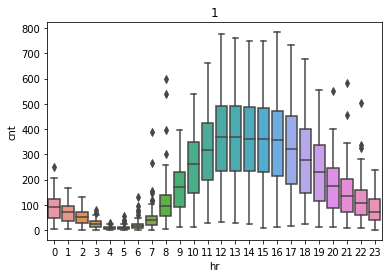

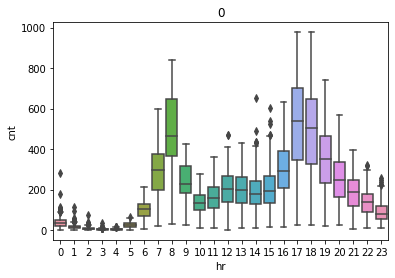

In [ ]:
import seaborn as sns
workingday=[0,1]
for i in range(0,2):
  df_workingday=df[df['workingday']==i]
  sns.boxplot(x="hr" ,y="cnt", data=df_workingday)
  plt.title(workingday[i-1])
  plt.show()

In [ ]:
print(df.columns)
y=df.pop('cnt')
X=df

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 117 kB/s 


In [ ]:
from sklearn.model_selection import KFold,GridSearchCV
cv=KFold(n_splits=10, shuffle=True)
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error,mean_absolute_error
import time
clf_list=[XGBRegressor(),LGBMRegressor(),CatBoostRegressor()]
clf_name=["XGBRegressor","LGBMRegressor","CatBoostRegressor"]

grid_xgb = {'learning_rate': [0.001, 0.01, 0.1, 0.3],
              'n_estimators':[100,700,1000,1200],
              'max_depth': [3,5,8,10],
                        }
grid_lgbm = {
    #'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid_catboost = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
param_grid = [grid_xgb,grid_lgbm,grid_catboost]
results=[]
results.append(["Method","RMSLE","R2","MSE","RMSE","MAE","Training Time","Prediction Time"])

#RMSLE Often, penalizing the under estimate more than over estimate is important for prediction of sales and inventory demands.
for i in range(len(clf_list)):
    clf = clf_list[i]
    print(clf)
    rmsle_scores = []
    r2_scores = []
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    training_time=[]
    prediction_time=[]
    for train_index, test_index in cv.split(X, y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        clf_gs = GridSearchCV(estimator=clf,param_grid=param_grid[i], cv=5,n_jobs=-1)
        clf_gs.fit(X_train, y_train)
        model_best = clf_gs.best_estimator_
        #model_best=clf
        training_time_start=time.time()
        model_best.fit(X_train, y_train)
        training_time.append(time.time()-training_time_start)
        prediction_time_start=time.time()
        y_prediction =model_best.predict(X_test)
        prediction_time.append(time.time()-prediction_time_start)

        print(clf)
        print(sum(n < 0 for n in y_prediction)) #negative predictions ?
        y_prediction=y_prediction.clip(min=0) #convert negative predicitons to 0 to calculate RMSLE
        print(sum(n < 0 for n in y_prediction)) #negative predictions ?
        rmsle_scores.append(mean_squared_log_error(y_test, y_prediction, squared=False))
        r2_scores.append(r2_score(y_test, y_prediction ))
        mse_scores.append(mean_squared_error(y_test, y_prediction))
        rmse_scores.append(mean_squared_error(y_test, y_prediction,squared=False))
        mae_scores.append(mean_absolute_error(y_test, y_prediction))

    results.append(
        [clf_name[i], np.mean(rmsle_scores), np.mean(r2_scores), np.mean(mse_scores), np.mean(rmse_scores),np.mean(mae_scores),np.mean(training_time),np.mean(prediction_time)])
results = pd.DataFrame(results)
timestr = time.strftime("%Y%m%d-%H%M%S")
results.to_excel('results' + timestr + '.xlsx')

XGBRegressor()
[11:51:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
18
0
[12:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
14
0
[13:06:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
10
0
[13:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:44:50] WARNING: /workspace/src/o